# 1. Import required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
import skimage
from skimage.filters.thresholding import threshold_li,threshold_local,threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, remove_small_objects, ball
from skimage.morphology import disk
from scipy import ndimage as ndi
import sys,os, glob

#import skimage.filters.median

#import skimage.segmentation as seg
#import skimage.filters as filters
#import skimage.draw as draw
#import skimage.color as color

#from skimage.filters.thresholding import _cross_entropy
#from skimage.morphology import black_tophat, skeletonize, convex_hull_image


#pip install nd2reader_required for nd2 file reading
from nd2reader import ND2Reader

import pandas as pd

c:\programdata\anaconda3\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


# 2. Load all analysis excels:

# BATCH B

In [3]:
# Combine batch B1 (already done)  211004IF_210921exp_DamMN

In [4]:
combined_df_b1 =pd.read_excel(r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211004IF_210921exp_DamMN\measurement_for_all_wells_background_subtracted_30_crop_Pol2_analyzed.xlsx", index_col=None)

In [5]:
# Combined batch B2 211007IF_210922exp_DamMN

In [6]:
# Common parameters for loading the image files of interest

# for 4 channels nd2 images: channel index order is 1-2-3-4, which is the order as ch405-ch488-ch560-ch647



data_save_folder = r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211007IF_210922exp_DamMN\*"

sub_folders = [_fd for _fd in glob.glob(data_save_folder) if 'doxPlusAID' in _fd and 'H3K27ac' not in _fd]


combined_df_b2 =pd.DataFrame()

for _fd in sub_folders:
    well_name = _fd.split('\\')[-1].split('_')[0]
    analysis_folders = _fd + os.sep + "analysis" + os.sep + well_name
    analysis_excel_name = (analysis_folders+ os.sep+ 
                           r"measurement_for_all_fov_background_subtracted_30_crop_Pol2_analyzed.xlsx")
    
    df =  pd.read_excel(analysis_excel_name, index_col=None)
    combined_df_b2=  pd.concat([combined_df_b2,df])
   

In [7]:
combined_df_b2.to_excel(r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211007IF_210922exp_DamMN\measurement_for_all_wells_background_subtracted_30_crop_Pol2_analyzed.xlsx", index=False)

In [8]:
# Combined batch B3 211012IF_210927exp_DamMN

In [9]:
# Common parameters for loading the image files of interest

# for 4 channels nd2 images: channel index order is 1-2-3-4, which is the order as ch405-ch488-ch560-ch647



data_save_folder = r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211012IF_210927exp_DamMN\*"

sub_folders = [_fd for _fd in glob.glob(data_save_folder) if 'doxPlusAID' in _fd and 'H3K27ac' not in _fd]


combined_df_b3 =pd.DataFrame()

for _fd in sub_folders:
    well_name = _fd.split('\\')[-1].split('_')[0]
    analysis_folders = _fd + os.sep + "analysis" + os.sep + well_name
    analysis_excel_name = (analysis_folders+ os.sep+ 
                           r"measurement_for_all_fov_background_subtracted_30_crop_Pol2_analyzed.xlsx")
    
    df =  pd.read_excel(analysis_excel_name, index_col=None)
    combined_df_b3=  pd.concat([combined_df_b3,df])
   

In [10]:
combined_df_b3.to_excel(r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211012IF_210927exp_DamMN\measurement_for_all_wells_background_subtracted_30_crop_Pol2_analyzed.xlsx", index=False)

In [11]:
# Combine all dfs from all exp/batch B

In [12]:
combined_df=pd.DataFrame()

df_to_combine = [combined_df_b1,combined_df_b2,combined_df_b3]

for _df in df_to_combine:
    combined_df = pd.concat([combined_df,_df])

In [13]:
combined_df.to_excel(r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchB\211012IF_210927exp_DamMN\measurement_for_BATCH-B-all_wells_background_subtracted_30_crop_Pol2_analyzed.xlsx", index=False)

# BATCH A

In [17]:
# load batch A1


# Common parameters for loading the image files of interest

# for 4 channels nd2 images: channel index order is 1-2-3-4, which is the order as ch405-ch488-ch560-ch647



data_save_folder = r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchA\210225IF_210201exp_Dam\*"

sub_folders = [_fd for _fd in glob.glob(data_save_folder) if 'oxPlusAID' in _fd and 'H3K27ac' not in _fd]


combined_df_a1 =pd.DataFrame()

for _fd in sub_folders:
    well_name = _fd.split('\\')[-1].split('_')[0]
    analysis_folders = _fd + os.sep + "analysis" + os.sep + well_name
    analysis_excel_name = (analysis_folders+ os.sep+ 
                           r"measurement_for_all_fov_background_subtracted_30_crop_Pol2_analyzed.xlsx")
    
    df =  pd.read_excel(analysis_excel_name, index_col=None)
    combined_df_a1=  pd.concat([combined_df_a1,df])

In [18]:
sub_folders 

['D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchA\\210225IF_210201exp_Dam\\well10_DoxPlusAID_60x',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchA\\210225IF_210201exp_Dam\\well12_doxPlusAID_60x',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchA\\210225IF_210201exp_Dam\\well5_doxPlusAID_60x',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchA\\210225IF_210201exp_Dam\\well9_DoxPlusAID_60x']

In [19]:
# load batch A2


# Common parameters for loading the image files of interest

# for 4 channels nd2 images: channel index order is 1-2-3-4, which is the order as ch405-ch488-ch560-ch647



data_save_folder = r"D:\Analyzed_CellBio\Stam\Dam_analysis_batchA\210614IF_210525DamMNexp\*"

sub_folders = [_fd for _fd in glob.glob(data_save_folder) if 'oxPlusAID' in _fd and 'H3K27ac' not in _fd]


combined_df_a2 =pd.DataFrame()

for _fd in sub_folders:
    well_name = _fd.split('\\')[-1].split('_')[0]
    analysis_folders = _fd + os.sep + "analysis" + os.sep + well_name
    analysis_excel_name = (analysis_folders+ os.sep+ 
                           r"measurement_for_all_fov_background_subtracted_30_crop_Pol2_analyzed.xlsx")
    
    df =  pd.read_excel(analysis_excel_name, index_col=None)
    combined_df_a2=  pd.concat([combined_df_a2,df])

In [20]:
sub_folders 

['D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchA\\210614IF_210525DamMNexp\\well3_DoxPlusAIDsm_60x',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchA\\210614IF_210525DamMNexp\\well4_DoxPlusAIDsm_60x',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchA\\210614IF_210525DamMNexp\\well5_DoxPlusAID_60x',
 'D:\\Analyzed_CellBio\\Stam\\Dam_analysis_batchA\\210614IF_210525DamMNexp\\well6_DoxPlusAID_60x']

In [21]:
combined_df_2=pd.DataFrame()

df_to_combine_2 = [combined_df_a1,combined_df_a2]

for _df in df_to_combine_2:
    combined_df_2 = pd.concat([combined_df_2,_df])

# 6. Post-hoc analysis examples

In [25]:
analysis_df= combined_df_2[combined_df_2['area_incorporated_chr']>100]

In [17]:
# save normalized Pol2

analysis_df=measurement_for_all_fov_df.copy()

# for total incorporated chr
analysis_df['normalized_inc_Pol2S5']=analysis_df['ave_intensity_incorporated_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
print(analysis_df['normalized_inc_Pol2S5'].mean())

# for h2ax-positive area with incorporated chr
analysis_df['normalized_inc_h2ax_pos_Pol2S5']=analysis_df['ave_intensity_h2ax_pos_incorporated_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
print(analysis_df['normalized_inc_h2ax_pos_Pol2S5'].mean())

# for h2ax-less (positive) area with incorporated chr
analysis_df['normalized_inc_h2ax_less_Pol2S5']=analysis_df['ave_intensity_h2ax_less_incorporated_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
print(analysis_df['normalized_inc_h2ax_less_Pol2S5'].mean())

# for nucleoli
analysis_df['normalized_nucleoli_Pol2S5']=analysis_df['ave_intensity_nucleolus_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
print(analysis_df['normalized_nucleoli_Pol2S5'].mean())

# get the h2ax-positive area vs h2ax-less (positive) area for the same cell
analysis_df['H2ax_pos_less_ratio_Pol2S5'] = analysis_df['ave_intensity_h2ax_pos_incorporated_chr_Pol2S5']/analysis_df['ave_intensity_h2ax_less_incorporated_chr_Pol2S5']
#analysis_df

# save the analyzed df
analysis_savename = f'measurement_for_all_fov_background_subtracted_{small_53BP_size}_crop_Pol2_analyzed.xlsx'
#analysis_save_path = data_save_folder[:-2] + os.sep + 'analysis' + os.sep + f'{data_name}' 
analysis_save_path = data_save_folder[:-2] + os.sep + 'analysis' + os.sep + data_name.split('_')[0]

analysis_df.to_excel(analysis_save_path+os.sep+analysis_savename)

NameError: name 'measurement_for_all_fov_df' is not defined

c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


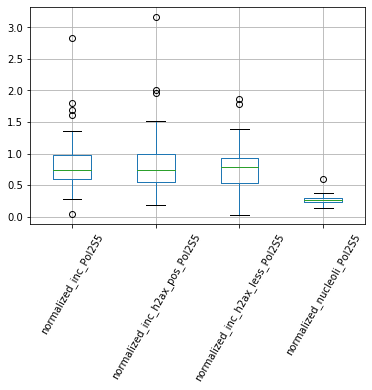

In [26]:
plt.figure();
from matplotlib.pyplot import figure

#figure(figsize=(6, 4), dpi=180)

analysis_df.boxplot(column=['normalized_inc_Pol2S5','normalized_inc_h2ax_pos_Pol2S5',
                                      'normalized_inc_h2ax_less_Pol2S5', 'normalized_nucleoli_Pol2S5'],rot=60)

In [33]:
#analysis_df

In [27]:
from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(analysis_df['normalized_inc_h2ax_pos_Pol2S5'], analysis_df['normalized_inc_h2ax_less_Pol2S5'])



from scipy.stats import kruskal


print(p1)


0.018321930830563125


In [28]:
analysis_df[analysis_df['H2ax_pos_less_ratio_Pol2S5']>0]

,Unnamed: 0,exp_name,position_id,cell_id,cell_xyz_coord,area_incorporated_chr,area_h2ax_within_incorporated_chr,area_less_h2ax_within_incorporated_chr,area_control_chr,area_nucleo-excluded_control_chr,...,ave_intensity_control_chr_Pol2S5,ave_intensity_nucleo-excluded_control_chr_Pol2S5,ave_intensity_nucleolus_Pol2S5,ave_intensity_h2ax_pos_incorporated_chr_Pol2S5,ave_intensity_h2ax_less_incorporated_chr_Pol2S5,normalized_inc_Pol2S5,normalized_inc_h2ax_pos_Pol2S5,normalized_inc_h2ax_less_Pol2S5,normalized_nucleoli_Pol2S5,H2ax_pos_less_ratio_Pol2S5
4,0,well10_DoxPlusAID_60x,well10_DoxPlusAID_1001.nd2_Pos12,1,"[[980, 1284], 5]",514,408,106,13540,3857,...,324.422904,370.869843,105.577952,164.008796,83.042043,0.394964,0.442227,0.223912,0.284677,1.975009
5,0,well10_DoxPlusAID_60x,well10_DoxPlusAID_1002.nd2_Pos5,1,"[[1104, 1069], 8]",357,92,265,9215,2690,...,326.469991,387.242295,80.035325,167.052469,315.121271,0.689749,0.431390,0.813757,0.206680,0.530121
6,0,well10_DoxPlusAID_60x,well10_DoxPlusAID_1003.nd2_Pos2,1,"[[1089, 1029], 7]",324,221,103,14111,3836,...,243.202409,284.792755,51.120722,167.342925,153.871856,0.546295,0.587595,0.540294,0.179501,1.087547
7,0,well10_DoxPlusAID_60x,well10_DoxPlusAID_1003.nd2_Pos9,1,"[[982, 1089], 5]",381,241,140,21518,5275,...,385.305057,443.869255,107.179767,198.856295,260.051195,0.500624,0.448006,0.585873,0.241467,0.764681
8,0,well10_DoxPlusAID_60x,well10_DoxPlusAID_1003.nd2_Pos10,1,"[[1062, 1086], 7]",387,219,168,15506,4202,...,119.018127,133.815710,40.300042,126.298005,11.103074,0.576570,0.943820,0.082973,0.301161,11.375049
10,0,well10_DoxPlusAID_60x,well10_DoxPlusAID_1004.nd2_Pos3,1,"[[1046, 1189], 6]",335,118,217,10022,2517,...,147.666238,168.612681,42.975376,124.601458,138.658824,0.802372,0.738980,0.822351,0.254876,0.898619
11,0,well10_DoxPlusAID_60x,well10_DoxPlusAID_1004.nd2_Pos8,1,"[[990, 914], 5]",491,300,191,15265,3954,...,199.632980,229.864769,63.526055,74.484831,117.591974,0.394011,0.324038,0.511570,0.276363,0.633418
12,0,well10_DoxPlusAID_60x,well10_DoxPlusAID_1004.nd2_Pos9,1,"[[1035, 1119], 6]",348,94,254,13205,3276,...,331.474798,380.986095,85.152170,394.026407,357.019462,0.960734,1.034228,0.937093,0.223505,1.103655
14,0,well10_DoxPlusAID_60x,well10_DoxPlusAID_1004.nd2_Pos18,1,"[[1077, 1113], 7]",243,146,97,6296,2257,...,364.876230,426.079215,100.397313,307.365184,334.729987,0.737260,0.721380,0.785605,0.235631,0.918248
18,0,well10_DoxPlusAID_60x,well10_DoxPlusAID_1005.nd2_Pos22,1,"[[1011, 1120], 5]",528,121,407,33543,9106,...,132.059534,151.329610,50.784683,109.397326,105.992094,0.648879,0.722908,0.700406,0.335590,1.032127


In [35]:
same_cell_example_df=analysis_df[analysis_df['H2ax_pos_less_ratio_Pol2S5']>0]

same_cell_example_df.to_excel(analysis_save_path+os.sep+"examples_with_both_damaged_positive_and_less_areas.xlsx")

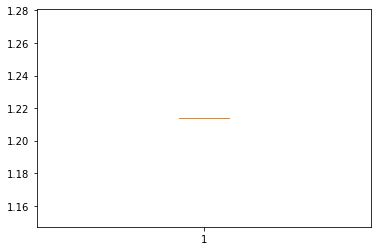

In [36]:
pos_neg_ratio = same_cell_example_df['H2ax_pos_less_ratio_Pol2S5']
boxplot_same_foci= plt.boxplot(pos_neg_ratio)

In [29]:
analysis_df['h2ax_damage_level']=analysis_df['area_h2ax_within_incorporated_chr']/analysis_df['area_incorporated_chr']

damaged_chr_df = analysis_df[analysis_df['h2ax_damage_level']>=0.5]

partial_damaged_chr_df = analysis_df[analysis_df['h2ax_damage_level']<0.5]

med_damaged_chr_df = partial_damaged_chr_df[partial_damaged_chr_df['h2ax_damage_level']>=0.1]

no_damaged_chr_df = partial_damaged_chr_df[partial_damaged_chr_df['h2ax_damage_level']<0.1]

C:\Users\Shiwei\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


C:\Users\Shiwei\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


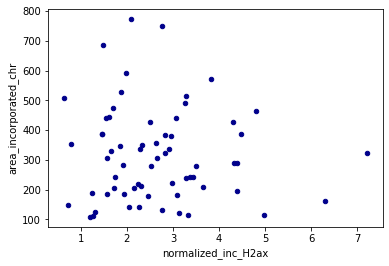

In [30]:
analysis_df['normalized_inc_H2ax'] = analysis_df['ave_intensity_incorporated_chr_H2ax']/analysis_df['ave_intensity_nucleo-excluded_control_chr_H2ax']
#analysis_df


analysis_df.plot.scatter(x='normalized_inc_H2ax',y='area_incorporated_chr',c='DarkBlue')

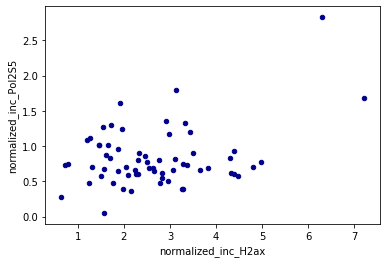

In [31]:
analysis_df.plot.scatter(x='normalized_inc_H2ax',y='normalized_inc_Pol2S5',c='DarkBlue')

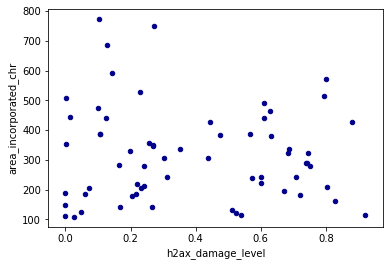

In [32]:
analysis_df.plot.scatter(x='h2ax_damage_level',y='area_incorporated_chr',c='DarkBlue')

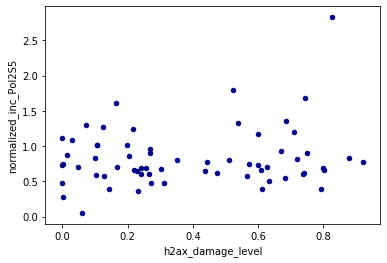

In [33]:
analysis_df.plot.scatter(x='h2ax_damage_level',y='normalized_inc_Pol2S5',c='DarkBlue')

In [41]:
print(damaged_chr_df['normalized_inc_Pol2S5'].mean())
print(damaged_chr_df['area_incorporated_chr'].mean())



print(med_damaged_chr_df['normalized_inc_Pol2S5'].mean())
print(med_damaged_chr_df['area_incorporated_chr'].mean())



print(no_damaged_chr_df['normalized_inc_Pol2S5'].mean())
print(no_damaged_chr_df['area_incorporated_chr'].mean())

#len(damaged_chr_df)
#len(med_damaged_chr_df)
#len(no_damaged_chr_df)

#len(analysis_df)

#no_damaged_chr_df['area_incorporated_chr'].mean()
#damaged_chr_df['area_incorporated_chr'].mean()

#analysis_df['area_h2ax_within_incorporated_chr'].mean()

#analysis_df['area_non_h2ax_within_incorporated_chr'].mean()

0.6855742384213158
344.3422459893048
0.6853090489589969
360.0344827586207
0.7969970869874697
301.7


c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


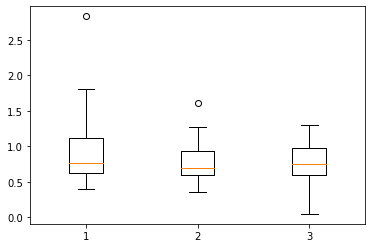

In [34]:
boxplot_pol2= plt.boxplot([damaged_chr_df['normalized_inc_Pol2S5'],med_damaged_chr_df['normalized_inc_Pol2S5'],no_damaged_chr_df['normalized_inc_Pol2S5']])

In [35]:
from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(damaged_chr_df['normalized_inc_Pol2S5'], no_damaged_chr_df['normalized_inc_Pol2S5'])

U2, p2 = mannwhitneyu(damaged_chr_df['normalized_inc_Pol2S5'], med_damaged_chr_df['normalized_inc_Pol2S5'])

U3, p3 = mannwhitneyu(med_damaged_chr_df['normalized_inc_Pol2S5'], no_damaged_chr_df['normalized_inc_Pol2S5'])

from scipy.stats import kruskal
p4 = kruskal(damaged_chr_df['normalized_inc_Pol2S5'],med_damaged_chr_df['normalized_inc_Pol2S5'],no_damaged_chr_df['normalized_inc_Pol2S5'])


print(p1)

print(p2)

print(p3)

print(p4)

0.3389387894141497
0.17512622638156577
0.3496502934502683
KruskalResult(statistic=0.9417311856241732, pvalue=0.6244615048859561)


c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


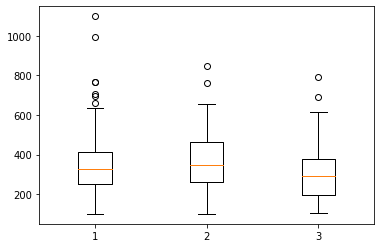

In [45]:
boxplot_size= plt.boxplot([damaged_chr_df['area_incorporated_chr'],med_damaged_chr_df['area_incorporated_chr'],no_damaged_chr_df['area_incorporated_chr']])

In [36]:
print(len(damaged_chr_df))

print(len(med_damaged_chr_df))

print(len(no_damaged_chr_df))



26
27
11


In [46]:
#no_damaged_chr_df[no_damaged_chr_df['area_incorporated_chr']==151]